In [53]:
#Konrad Szwed projekt 0.1

#Bibliografia:
#https://dzone.com/articles/image-data-analysis-using-numpy-amp-opencv


In [54]:
import glob
import os
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import csv
import timeit

In [55]:
from time import perf_counter
from functools import wraps
def mierz_czas(f):
    @wraps(f)
    def opakowanie(*args, **kwargs):
        #print('Czas wykonywania ', f.__name__, ' = ')
        start = perf_counter()
        stop = perf_counter()
        opakowanie.czas=stop-start
        return f(*args, **kwargs)
    return opakowanie

In [84]:
#ŚCIEŻKI DOSTĘPU
#WPISZ SCIEZKE DO FOLDERU W KTORYM ZBADAMY PLIKI GRAFICZNE (zostaw to r''' i ''' na końcu)
#domyślnie: \Users\rooni\Desktop\projekt_analiza_obrazu\baza
#########################################################################
user_path=r'''C:\Users\rooni\Desktop\PHOTOSHOP'''
#user_path=r'''D:\Lelz'''

#########################################################################
stats_path=r'''C:\Users\rooni\Desktop\projekt_analiza_obrazu\stats'''
#stats_path=r'''C:\Users\KSzwed\repositories\projekt_analiza_obrazu\stats'''

In [85]:
#pobieranie stricte obrazow z folderu
path, dirs, files = next(os.walk(user_path))

print("W folderze jest :", len(files) ,"plikow")
files = [ fi for fi in files if fi.endswith(".jpg") ]
file_count = len(files)
print("W tym :", len(files) ,"plików jpg")

W folderze jest : 72 plikow
W tym : 34 plików jpg


In [86]:
#test konkretnego pliku
get_ipython().run_line_magic('matplotlib', 'inline')
@mierz_czas
def test_img(file):
    pic = imageio.imread(file)
    plt.figure(figsize = (15,15))
    plt.imshow(pic)

    print('Type of the image: ' , type(pic))
    print('Shape of the image: {}'.format(pic.shape))
    print(f'Image Hight: {pic.shape[0]} pixels')
    print(f'Image Width: {pic.shape[1]} pixels')
    print('Dimension of Image: {}'.format(pic.ndim))
    print('Image size: {}'.format(pic.size))
    print('Maximum RGB value in this image: {}'.format(pic.max()))
    print('Minimum RGB value in this image: {}'.format(pic.min()))
    try:
        print('Value of only R channel: {}'.format(pic[ 100, 50, 0]))
        print('Value of only G channel: {}'.format(pic[ 100, 50, 1]))
        print('Value of only B channel: {}'.format(pic[ 100, 50, 2]))
    except IndexError:
        print("RGB canals error")

In [87]:
@mierz_czas
def imgstats(file):
    pic = imageio.imread(file)
    img_stats=[]
    global i
    img_stats.append(i)
    img_stats.append(file)
    img_stats.append(type(pic))
    img_stats.append(pic.shape[0])
    img_stats.append(pic.shape[1])
    img_stats.append(pic.ndim)
    img_stats.append(pic.size)
    img_stats.append(pic.max())
    img_stats.append(pic.min())
    try:
        img_stats.append(pic[100, 50, 0])
        img_stats.append(pic[ 100, 50, 1])
        img_stats.append(pic[ 100, 50, 2])
    except IndexError:
        img_stats.append(0)
        img_stats.append(0)
        img_stats.append(0)
    return img_stats

In [88]:
Titles=['Index','File name','Type of the image','Image Height','Image Width','Dimension of Image','Image size','Maximum RGB','Minimum RGB','R channel','G channel','B channel','Baza wygenerowana przez Konrad Szwed dnia {} | Zawiera {} elementow'.format(datetime.datetime.today(),file_count)]

In [89]:
#test w razie problemow z konkretnym plikiem
#file=user_path+'\{}'.format(files[10])
#test_img(file)

In [90]:
#Sprawdzenie poprzedniego pliku ze statystykami
#path_oldstat='./stats/'
path_oldstat=stats_path
if os.path.isfile(path_oldstat+'stats.csv') :
    if os.path.isfile(path_oldstat+'old_stats.csv') :    
        os.unlink(path_oldstat+'old_stats.csv')
    os.rename(path_oldstat+'stats.csv', path_oldstat+'old_stats.csv')
    print('Utworzono backup poprzedniej bazy danych w folderze {},pod nazwą {}'.format(path_oldstat, os.listdir(path_oldstat)))
    
#Tworzenie csv
with open(stats_path+'\stats.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar=' ', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(Titles)
    #file_count ale do testow ustawcie mniejsza liczbe
    for i in range(file_count):
        file=user_path+'\{}'.format(files[i])
        filewriter.writerow(imgstats(file))
        
#print(imgstats('baza\{}'.format(files[0])))

In [91]:
def wyswietl(stats):
    return('Image Height:{:.2f}\n Image Width:{:.2f}\n Dimension of Image:{:.2f}\n Image size:{:.2f}Mb\n Maximum RGB:{:.2f}\n Minimum RGB:{:.2f}\n R channel:{:.2f}\n G channel:{:.2f}\n B channel:{:.2f}'.format(stats[0],stats[1],stats[2],stats[3]*pow(10,-6),stats[4],stats[5],stats[6],stats[7],stats[8]))

In [92]:
#dokonczyc srednia
def srednia(stats):
    avg=[]
    suma=0
    for i in stats:
        suma+=i[]
    return avg

In [93]:
#tworzymy dane
dane=[]
for i in range(file_count):
    file=user_path+'\{}'.format(files[i])
    dane.append(imgstats(file))
#print(dane)

[[0, 'C:\\Users\\rooni\\Desktop\\PHOTOSHOP\\1527348067543.jpg', <class 'imageio.core.util.Array'>, 480, 351, 3, 505440, 255, 0, 156, 156, 156], [1, 'C:\\Users\\rooni\\Desktop\\PHOTOSHOP\\1536528077791.jpg', <class 'imageio.core.util.Array'>, 320, 180, 3, 172800, 255, 0, 254, 254, 254], [2, 'C:\\Users\\rooni\\Desktop\\PHOTOSHOP\\1536955571821.jpg', <class 'imageio.core.util.Array'>, 390, 293, 3, 342810, 255, 0, 151, 166, 185], [3, 'C:\\Users\\rooni\\Desktop\\PHOTOSHOP\\1537042188146.jpg', <class 'imageio.core.util.Array'>, 320, 180, 3, 172800, 255, 0, 60, 62, 61], [4, 'C:\\Users\\rooni\\Desktop\\PHOTOSHOP\\20626312_1660294517348787_6425678879563334507_o.jpg', <class 'imageio.core.util.Array'>, 2048, 1536, 3, 9437184, 255, 0, 233, 231, 244], [5, 'C:\\Users\\rooni\\Desktop\\PHOTOSHOP\\25734018_1790495350985084_8251639220813796590_o.jpg', <class 'imageio.core.util.Array'>, 1080, 1440, 3, 4665600, 255, 0, 221, 174, 118], [6, 'C:\\Users\\rooni\\Desktop\\PHOTOSHOP\\31950079_10209467206037046_

In [124]:
#Statystyki uśrednione
avg=[0,0,0,0,0,0,0,0,0]

for i in range(0,len(dane)):
    for x in range(3,12):
        #print(dane[i][x])
        avg[x-3]+=dane[i][x]
for i in range(0,len(avg)):
    avg[i]=avg[i]/len(dane)

#print (avg)
#for i in range(9):
#    stats[i]=stats[i]/file_count
#print(stats)    
print("Wyniki średnie:")    
print(wyswietl(avg))


Wyniki średnie:
Image Height:1616.68
 Image Width:1449.53
 Dimension of Image:3.00
 Image size:10.74Mb
 Maximum RGB:252.82
 Minimum RGB:1.18
 R channel:117.21
 G channel:112.24
 B channel:104.97


wykres średnia z RGB channels


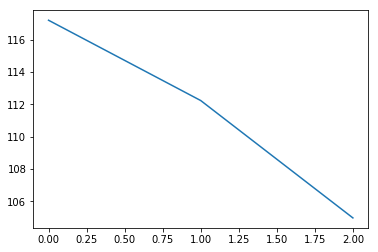

In [123]:
#wykresy
print("wykres średnia z RGB channels")
y = [avg[6],avg[7],avg[8]]
plt.plot(y)
plt.show()


In [38]:
#Czasy funkcji
print("Czasy poszczególnych funkcji:")
funkcje = [srednia,imgstats,test_img]
for i in funkcje:
    #print("{} : {}".format(i.__name__,i.czas))
    print("{} : ".format(i.__name__))

Czasy poszczególnych funkcji:
srednia : 
imgstats : 
test_img : 


ValueError: x and y must have same first dimension, but have shapes (256,) and (34,)

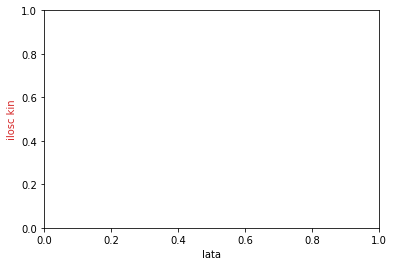

In [133]:
#przygotujemy dane
t=range(256)
data1,data2,data3=[],[],[]
for i in range(0,len(dane)):
    data1.append(dane[i][9])
    data2.append(dane[i][10])
    data3.append(dane[i][11])

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('lata')
ax1.set_ylabel('ilosc kin', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('ilosc sal', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax2.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('ilosc sal', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data3, color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.title("Ilość sal w kinach w Polsce w poszczególnych latach")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()